## PClass EDA

* 3 categorical variables problem
* 2 variables binary, one multiclass.
* 1 dependent variable, 2 independent.

In [121]:
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()
os.chdir(os.getenv('ROOT_DIR'))

In [122]:
# --- Parameters ---
df_train_path = os.getenv('DF_TRAIN_PATH')
df_test_path = os.getenv('DF_NEW_DATA_PATH')

print(df_train_path)

data/raw/train.csv


In [123]:
df_train = pd.read_csv(df_train_path)
df_test = pd.read_csv(df_test_path)

df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [124]:
df_train.info()

# 891 datapoints, 12 cols.
# 10 are features, 1 is the target and 1 the index 
# Age, Cabin and Embarked have missing values (3 features)
# Categorical features: Pclass, Name, Sex, Ticket, Cabin, Embarked (6 features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
df_test.info()

# 418 datapoints to predict, 11 cols.
# The same features as the training set, except the target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [126]:
# Project
# 1. Analyze Pclass
### 1.1. Check consistency
### 1.2. Check distribution
### 1.3. Check correlation with target
### 1.4. Multivariate analysis

### 1.1.Check Consistency

In [127]:
# 1.1. Check consistency
df_train.Pclass.unique()

# 3 classes

array([3, 1, 2])

In [128]:
df_test.Pclass.unique()

array([3, 2, 1])

In [129]:
df_train.Pclass.isna().sum()
# not na

np.int64(0)

In [130]:
df_test.Pclass.isna().sum()

np.int64(0)

### 1.2. Check distribution

In [131]:
# 1.2. Check distribution
df_train.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [132]:
df_train.Pclass.value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [133]:
df_test.Pclass.value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [134]:
df_test.Pclass.value_counts(normalize=True)

# In both datasets: 50% third class, 25% first class and 25% second class.

Pclass
3    0.521531
1    0.255981
2    0.222488
Name: proportion, dtype: float64

### 1.3. Check corr with target

In [135]:
### 1.3 check correlation with target

### Graphical: Stacked bar chart
### Statistical: Contingency table
### Statistical: Chi-square test of independence
### (NOT POSSIBLE, ONLY FOR 2 BINARY VARIABLES). Fisher's exact test

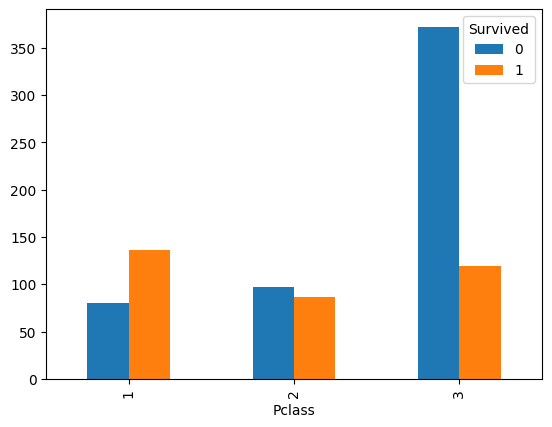

In [136]:
# Stacked bar chart
import matplotlib.pyplot as plt
pd.crosstab(df_train.Pclass, df_train.Survived).plot(kind='bar', stacked=False)
plt.show()
# INSIGHT-1: First class passengers are more likely to survive compared to second and third class passengers.
# Pclass is a good predictor of survival.

In [137]:
# Contingency table
contingency_table = pd.crosstab(df_train.Pclass, df_train.Survived, margins=True)
contingency_table

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [138]:
pd.crosstab(df_train.Pclass, df_train.Survived, normalize='index')

# It reinforces insight 1: 62$ of first class passengers survived 
# compared to 47% of 2class and 24% of 3class passengers.

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [139]:
# Chi-square test of independence
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_train.Pclass, df_train.Survived)
chi2, p , dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square: {chi2}, p-value: {p}, dof: {dof}')

# p-value < 0.05, we reject the null hypothesis that Pclass and Survived are independent.
# It reinforces insight 1.

Chi-square: 102.88898875696056, p-value: 4.549251711298793e-23, dof: 2


### 1.4. Multivariate Analysis

In [154]:
### 1.4. Multivariate analysis
### Statistical: Multivariate cross-tabulation (not so useful)
### Graphical: Heatmap on Multivariate cross-tabulation (not so useful)
### Statistical: Logistic regression
### Statistical: Logistic regression with interaction terms
### Statistical: Association rules.

In [156]:
### Multivariate cross-tabulation
df_train = pd.read_csv(df_train_path)
pd.crosstab([df_train.Sex, df_train.Pclass], [df_train.Survived], margins=True)

Survived         0    1  All
Sex    Pclass               
female 1         3   91   94
       2         6   70   76
       3        72   72  144
male   1        77   45  122
       2        91   17  108
       3       300   47  347
All            549  342  891

In [141]:
pd.crosstab([df_train.Sex, df_train.Pclass], [df_train.Survived], normalize='index')

Survived              0         1
Sex    Pclass                    
female 1       0.031915  0.968085
       2       0.078947  0.921053
       3       0.500000  0.500000
male   1       0.631148  0.368852
       2       0.842593  0.157407
       3       0.864553  0.135447

<Axes: xlabel='Survived', ylabel='Sex-Pclass'>

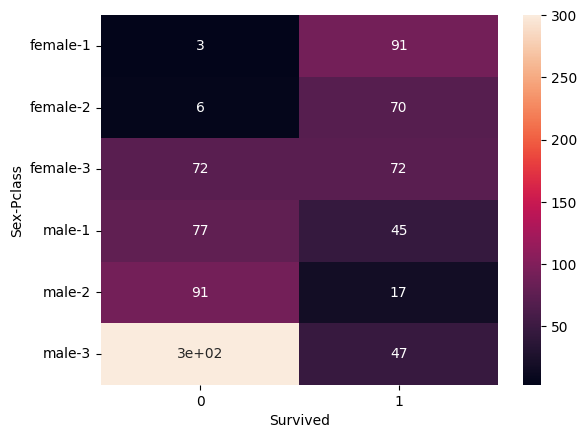

In [143]:
# Heatmap on Multivariate cross-tabulation
import seaborn as sns
import matplotlib.pyplot as plt

cont_table = pd.crosstab([df_train.Sex, df_train.Pclass], [df_train.Survived])
sns.heatmap(cont_table, annot=True)

# not so useful

In [146]:
### Logistic Regression
import statsmodels.api as sm

df_train = pd.read_csv(df_train_path)
df_train['Sex2'] = df_train.Sex.map({'male': 1, 'female':0})
df_train = pd.get_dummies(df_train, columns=['Pclass'], drop_first=True) # for LR, we need to drop one of the classes

x = df_train[['Sex2', 'Pclass_2', 'Pclass_3']]
x = sm.add_constant(x).astype('int')
y = df_train['Survived']

model = sm.Logit(y, x).fit()
print(model.summary())

# less relvant than Sex, Pclass still helps to predict survival.
# Pclass coefs are negative, which means that the higher the class (2,3), the lower the probability of survival.
# LL-null and LL-pvalue < 0.05, the model is significant, better than a null model.
# The results reinforces insights 1.


Optimization terminated successfully.
         Current function value: 0.464023
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.3032
Time:                        13:23:34   Log-Likelihood:                -413.44
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.145e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2971      0.219     10.490      0.000       1.868       2.726
Sex2          -2.6419      0.

In [147]:
# Logistic regression with interaction terms
df_train = pd.read_csv(df_train_path)[['Survived', 'Sex', 'Pclass']]
df_train['Sex'] = df_train.Sex.map({'male':1, 'female':0})
df_train = pd.get_dummies(df_train, columns=['Pclass'], drop_first=True).astype('int')
df_train['sex_pclass2'] = df_train.Sex * df_train.Pclass_2
df_train['sex_pclass3'] = df_train.Sex * df_train.Pclass_3

x = df_train[['Sex', 'Pclass_2', 'Pclass_3', 'sex_pclass2', 'sex_pclass3']]
x = sm.add_constant(x).astype('int')

y = df_train.Survived

interaction_model = sm.Logit(y, x).fit()
print(interaction_model.summary())

# INSIGHT-2: The interaction between sex and Pclass3 is significant.
# So, the effect of Sex on survival depends on the class. 

Optimization terminated successfully.
         Current function value: 0.447866
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.3274
Time:                        13:24:24   Log-Likelihood:                -399.05
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.670e-82
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4122      0.587      5.815      0.000       2.262       4.562
Sex            -3.9494    

In [148]:
pd.crosstab(df_train.Sex, df_train.Survived, normalize='index')

Survived,0,1
Sex,,
0,0.257962,0.742038
1,0.811092,0.188908


In [153]:
tmp = df_train.loc[df_train.Pclass_3 == 1]
pd.crosstab(tmp.Sex, tmp.Survived, normalize='index')

# It reinforces insight 2. If you were women (=0), you were more likely to survive, except if you were in third class.

Survived,0,1
Sex,,
0,0.500000,0.500000
1,0.864553,0.135447


In [106]:
# Association rules
from mlxtend.frequent_patterns import apriori, association_rules

df_train = pd.read_csv(df_train_path)[['Survived', 'Pclass', 'Sex']]
df_encoded = pd.get_dummies(df_train, columns=['Pclass', 'Sex']).astype('int')
df_encoded

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.4)
print(rules)

               antecedents             consequents  antecedent support  \
0               (Pclass_1)              (Survived)            0.242424   
1               (Survived)            (Sex_female)            0.383838   
2             (Sex_female)              (Survived)            0.352413   
3               (Pclass_1)            (Sex_female)            0.242424   
4               (Pclass_1)              (Sex_male)            0.242424   
5               (Pclass_2)              (Sex_male)            0.206510   
6             (Sex_female)              (Pclass_3)            0.352413   
7               (Pclass_3)              (Sex_male)            0.551066   
8               (Sex_male)              (Pclass_3)            0.647587   
9     (Survived, Pclass_1)            (Sex_female)            0.152637   
10  (Pclass_1, Sex_female)              (Survived)            0.105499   
11              (Pclass_1)  (Survived, Sex_female)            0.242424   

    consequent support   support  con

### 1.5. General Results 

1. INSIGHT-1: First class passengers are more likely to survive compared to second and third class passengers. Pclass is a good predictor of survival.

2. INSIGHT-2: The interaction between sex and Pclass3 is significant.
So, the effect of Sex on survival depends on the class. 

Pclass is a good predictor of survival. However, it's weaker for Pclass3 where there isn't a strong association Women->Survive as in the other 2 Pclass.